In [144]:
import pandas as pd
import json
from os.path import exists
from pprint import pprint as pp
from quality_match.types import TaskInput, TaskOutput, Answer

REFERENCES_DATA_PATH = '../data/references.json'
ANONYMIZED_PROJECT_DATA_PATH = '../data/anonymized_project.json'    

def get_answer_disagree_score(task_output: TaskOutput) -> int:    
    ans_map = {Answer.NO: -1, Answer.YES: 1}
    
    if task_output.answer == Answer.EMPTY:
        return 0

    return ans_map[task_output.answer]

def get_reference_key(task_input: TaskInput) -> bool:    
    return task_input.image_url.split("/")[-1].split(".")[0]

def load_normalized_data():
    if not exists(REFERENCES_DATA_PATH) or not exists(ANONYMIZED_PROJECT_DATA_PATH):
        raise Exception("Data files not found ...")
    
    references = pd.read_json(REFERENCES_DATA_PATH).T
    anonymized_project_json_file = json.load(open(ANONYMIZED_PROJECT_DATA_PATH))
    anonymized_project_data = anonymized_project_json_file['results']['root_node']['results']

    records = []
    for task_id, tasks in anonymized_project_data.items():
        for record in tasks['results']:
            record['task_id'] = task_id
            record['answer_disagree_score'] = get_answer_disagree_score(TaskOutput.from_dict(record['task_output']))
            ref_key = get_reference_key(TaskInput.from_dict(record['task_input']))        
            record['reference'] = references.loc[ref_key, 'is_bicycle']
            records.append(record)        
                
    data = pd.json_normalize(records)
    
    # Normalize
    data.loc[data['task_output.duration_ms'] < 0, "task_output.duration_ms"] = 0 # do we have a real data value "0"?
    data.astype({'task_output.duration_ms': 'int64'})

    return data, references

data, references = load_normalized_data()
data

,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_id,answer_disagree_score,reference,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
0,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,997,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
1,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,845,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...
2,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1468,vendor_01,780c974e-6ce7-4f1d-9afe-56bf96753fca,annotator_22,https://qm-auto-annotator.s3.eu-central-1.amaz...
3,2021-02-26T03:56:18.770331+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,4222ac20-7aaa-4b07-bb2b-4423bf41eefe,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1062,vendor_01,94afdf79-917c-4904-bdaa-7a121f33b0ff,annotator_17,https://qm-auto-annotator.s3.eu-central-1.amaz...
4,2021-02-25T15:39:06.644705+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,42ba767f-5bd1-4e62-aff1-4e716fd23623,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,879,vendor_01,37a6036c-a9ef-4fcb-b554-7058f00415db,annotator_02,https://qm-auto-annotator.s3.eu-central-1.amaz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90865,2021-02-25T14:50:17.777598+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,c15c69ca-fd11-49b2-b198-d998ed1d6909,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,2690,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
90866,2021-02-26T04:11:29.015906+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,e7674678-572c-4fbb-b0dd-7e43bbc6cfad,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1407,vendor_01,66d63556-1235-4a5e-accc-651cb2993db4,annotator_16,https://qm-auto-annotator.s3.eu-central-1.amaz...
90867,2021-02-25T13:58:18.253317+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,ee448bd3-a93e-4586-a5a7-e3722b052d9a,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1293,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
90868,2021-02-25T13:02:51.311501+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,f2859473-b7a0-4c55-b5d9-ee80fa4a75a9,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1306,vendor_01,9fddf227-6680-42f5-aca5-533fc439c193,annotator_04,https://qm-auto-annotator.s3.eu-central-1.amaz...


In [145]:
# How many annotators did contribute to the dataset?
len(data['user.id'].unique())

22

In [146]:
# What are the average, min and max annotation times (durations)?
data['task_output.duration_ms'].describe()

count    90870.000000
mean      1289.836184
std       1124.011302
min          0.000000
25%        887.000000
50%       1058.000000
75%       1328.000000
max      42398.000000
Name: task_output.duration_ms, dtype: float64

<Axes: >

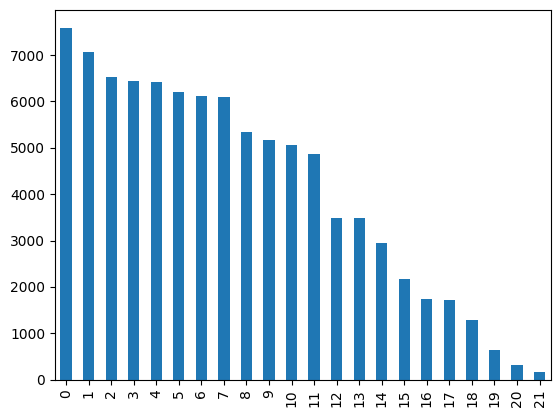

In [147]:
# Did all annotators produce the same amount of results, or are there differences? 
df = data.groupby("user.id").agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()
df
df['count'].plot.bar()

In [148]:
# Are there questions for which annotators highly disagree?
d1 = data.groupby("task_input.image_url").agg(sum=('answer_disagree_score', 'sum')).reset_index()
d2 = d1[d1['sum'] == 0]['task_input.image_url']#.iloc[:1]
d3 = data[data['task_input.image_url'].isin(d2)] 
d3


,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_id,answer_disagree_score,reference,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
1290,2021-02-25T14:39:49.714228+00:00,5,0.0,e6700252-2540-4503-b601-9ea77c5824c3,0060773c-edb0-4e38-81e8-a448f93e8e7f,e6700252-2540-4503-b601-9ea77c5824c3,e6700252-2540-4503-b601-9ea77c5824c3,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,13385,vendor_01,6d8be901-c6a6-43f8-a5ac-8e44b924bd84,annotator_09,https://qm-auto-annotator.s3.eu-central-1.amaz...
1291,2021-02-26T04:00:16.081777+00:00,5,0.0,e6700252-2540-4503-b601-9ea77c5824c3,12aa4768-8cf8-4f8b-b781-c4169d08f62c,e6700252-2540-4503-b601-9ea77c5824c3,e6700252-2540-4503-b601-9ea77c5824c3,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1655,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,https://qm-auto-annotator.s3.eu-central-1.amaz...
1292,2021-02-25T13:21:30.910125+00:00,5,0.0,e6700252-2540-4503-b601-9ea77c5824c3,171b2517-31d5-46c6-bfd5-6fdbc54a6478,e6700252-2540-4503-b601-9ea77c5824c3,e6700252-2540-4503-b601-9ea77c5824c3,-1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,7785,vendor_01,da2b934c-6384-44ea-adcd-3de648bfae89,annotator_08,https://qm-auto-annotator.s3.eu-central-1.amaz...
1293,2021-02-25T15:05:28.363888+00:00,5,0.0,e6700252-2540-4503-b601-9ea77c5824c3,23678d94-aa18-4108-bcb2-a8861bc873c5,e6700252-2540-4503-b601-9ea77c5824c3,e6700252-2540-4503-b601-9ea77c5824c3,-1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1560,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,https://qm-auto-annotator.s3.eu-central-1.amaz...
1294,2021-02-25T13:47:57.761883+00:00,5,0.0,e6700252-2540-4503-b601-9ea77c5824c3,6d1602c1-0832-4503-ae52-4c798bf1c438,e6700252-2540-4503-b601-9ea77c5824c3,e6700252-2540-4503-b601-9ea77c5824c3,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1063,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,https://qm-auto-annotator.s3.eu-central-1.amaz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90575,2021-02-25T12:39:05.168139+00:00,5,0.0,b5c37a5f-250d-47a9-9931-795d8e3c9856,afe11970-351a-4be2-9017-c44f30a6220a,b5c37a5f-250d-47a9-9931-795d8e3c9856,b5c37a5f-250d-47a9-9931-795d8e3c9856,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,2575,vendor_01,0e606b41-ebe4-4d7d-996c-db910c84971a,annotator_20,https://qm-auto-annotator.s3.eu-central-1.amaz...
90576,2021-02-25T15:01:40.459996+00:00,5,0.0,b5c37a5f-250d-47a9-9931-795d8e3c9856,c4807473-5a14-4cfe-8927-4f0053126422,b5c37a5f-250d-47a9-9931-795d8e3c9856,b5c37a5f-250d-47a9-9931-795d8e3c9856,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1446,vendor_01,94afdf79-917c-4904-bdaa-7a121f33b0ff,annotator_17,https://qm-auto-annotator.s3.eu-central-1.amaz...
90577,2021-02-25T13:17:09.435843+00:00,5,0.0,b5c37a5f-250d-47a9-9931-795d8e3c9856,d22f2dd0-65a3-4268-aa8e-82f1e3165d8c,b5c37a5f-250d-47a9-9931-795d8e3c9856,b5c37a5f-250d-47a9-9931-795d8e3c9856,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1326,vendor_01,6d8be901-c6a6-43f8-a5ac-8e44b924bd84,annotator_09,https://qm-auto-annotator.s3.eu-central-1.amaz...
90578,2021-02-25T13:44:20.798797+00:00,5,0.0,b5c37a5f-250d-47a9-9931-795d8e3c9856,def3dd24-e70b-4f75-b1c7-deb05c162193,b5c37a5f-250d-47a9-9931-795d8e3c9856,b5c37a5f-250d-47a9-9931-795d8e3c9856,-1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1194,vendor_01,66d63556-1235-4a5e-accc-651cb2993db4,annotator_16,https://qm-auto-annotator.s3.eu-central-1.amaz...


In [155]:
# How often does each occur in the project and do you see a trend within the annotators that made use of these options?

# data[data['answer_disagree_score'] == 0]
data[data['task_output.answer'] == '']

,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_id,answer_disagree_score,reference,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
2742,2021-02-25T13:50:48.203614+00:00,5,0.0,a20993e3-3d83-49bb-ba28-743e60c1e7d9,4417f5e1-c9bc-417b-9d57-20c02e15644c,a20993e3-3d83-49bb-ba28-743e60c1e7d9,a20993e3-3d83-49bb-ba28-743e60c1e7d9,0,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,839,vendor_01,32971d11-e972-4d73-99a6-0847e1261995,annotator_18,https://qm-auto-annotator.s3.eu-central-1.amaz...
3943,2021-02-25T15:17:09.468249+00:00,5,0.0,d0e064ac-c212-4bfb-9861-cffd40ca6c36,7075a2c2-f4da-478a-9b77-ff125f8689bf,d0e064ac-c212-4bfb-9861-cffd40ca6c36,d0e064ac-c212-4bfb-9861-cffd40ca6c36,0,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,695,vendor_01,780c974e-6ce7-4f1d-9afe-56bf96753fca,annotator_22,https://qm-auto-annotator.s3.eu-central-1.amaz...
4194,2021-02-25T14:48:27.963058+00:00,5,0.0,beae64a7-bc5e-499f-9c6e-15a3f2092587,8979fd94-4c52-44c2-9820-9911be742e38,beae64a7-bc5e-499f-9c6e-15a3f2092587,beae64a7-bc5e-499f-9c6e-15a3f2092587,0,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,,False,True,903,vendor_01,32971d11-e972-4d73-99a6-0847e1261995,annotator_18,https://qm-auto-annotator.s3.eu-central-1.amaz...
7413,2021-02-26T03:38:22.398688+00:00,5,0.0,cb9c4d05-4a8a-4ebe-b774-17636ddd08b7,655d96b8-8e9e-41f1-aef9-549f9700b334,cb9c4d05-4a8a-4ebe-b774-17636ddd08b7,cb9c4d05-4a8a-4ebe-b774-17636ddd08b7,0,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,863,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...
7733,2021-02-25T17:58:23.095451+00:00,5,0.0,cc145928-983b-4827-abf7-cbfc8ae52f08,501c6430-cc7d-49cf-823a-997659d2c1d8,cc145928-983b-4827-abf7-cbfc8ae52f08,cc145928-983b-4827-abf7-cbfc8ae52f08,0,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,,False,True,0,vendor_01,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,https://qm-auto-annotator.s3.eu-central-1.amaz...
11008,2021-02-26T02:33:19.119928+00:00,5,0.0,d80e9290-4ebd-4274-8021-7d5031326015,e4aefd5f-eec9-4c53-a46f-a4740bbde920,d80e9290-4ebd-4274-8021-7d5031326015,d80e9290-4ebd-4274-8021-7d5031326015,0,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,1605,vendor_01,d40ae601-32bf-4b0c-b92c-5bd474e40c18,annotator_07,https://qm-auto-annotator.s3.eu-central-1.amaz...
15243,2021-02-25T14:07:25.877275+00:00,5,0.0,59d52ce8-ed78-48ef-b1ec-d15d6c57fbb9,81630336-e4ba-4e3c-86c4-1532d9cf43cb,59d52ce8-ed78-48ef-b1ec-d15d6c57fbb9,59d52ce8-ed78-48ef-b1ec-d15d6c57fbb9,0,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,414,vendor_01,9fddf227-6680-42f5-aca5-533fc439c193,annotator_04,https://qm-auto-annotator.s3.eu-central-1.amaz...
15738,2021-02-25T13:54:03.766952+00:00,5,0.0,62c1a557-9371-4034-99d7-e1a37a3e053a,ea8f63d5-6643-4922-95f1-0558bf38fb80,62c1a557-9371-4034-99d7-e1a37a3e053a,62c1a557-9371-4034-99d7-e1a37a3e053a,0,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,870,vendor_01,da2b934c-6384-44ea-adcd-3de648bfae89,annotator_08,https://qm-auto-annotator.s3.eu-central-1.amaz...
19432,2021-02-25T13:56:28.278248+00:00,5,0.0,ed0560c7-1595-46f2-9efe-9e4599ac8951,1a2d2b1d-fffa-4bba-9a46-62d8da69c983,ed0560c7-1595-46f2-9efe-9e4599ac8951,ed0560c7-1595-46f2-9efe-9e4599ac8951,0,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,,True,False,1910,vendor_01,da2b934c-6384-44ea-adcd-3de648bfae89,annotator_08,https://qm-auto-annotator.s3.eu-central-1.amaz...
22669,2021-02-26T04:00:43.982528+00:00,5,0.0,616a1794-1c4a-42db-86cb-20625eafe451,ddf6fda6-5234-48df-b10c-b7fde0590f2f,616a1794-1c4a-42db-86cb-20625eafe451,616a1794-1c4a-42db-86cb-20625eafe451,0,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,,False,True,198,vendor_01,da2b934c-6384

In [150]:
# Is the reference set balanced? Please demonstrate via numbers and visualizations.
references['is_bicycle'].value_counts()

True     4586
False    4501
Name: is_bicycle, dtype: int64

In [151]:
# Using the reference set, can you identify good and bad annotators? Please use statistics and visualizations. Feel free to get creative.


def check_answer(rec):
    if rec['task_output.answer']:
        if rec['task_output.answer'] == 'yes' and rec['reference'] is True:
            return True
        if rec['task_output.answer'] == 'no' and rec['reference'] is False:
            return True
    return False

# TODO: Find better scoring function
bad_annotations = data[data.apply(lambda rec: not check_answer(rec) , axis=1)].groupby('user.id').agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()
good_annotations = data[data.apply(lambda rec: check_answer(rec) , axis=1)].groupby('user.id').agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()

users = data.groupby('user.id').agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()
users['bad_annotation_count'] = bad_annotations['count']
users['good_annotation_count'] = good_annotations['count']
users['annotation_score'] = (users['good_annotation_count'] / users['count']) * 100

users.sort_values('annotation_score', ascending=False)



,user.id,count,bad_annotation_count,good_annotation_count,annotation_score
18,44629999-ab8a-4871-b4d3-4f92c3058161,1280,66,1214,94.843750
7,75f1e1c8-d127-430f-a885-c2d126364198,6088,329,5774,94.842313
21,b44e310d-7985-41a0-b764-034b711c75ca,170,9,161,94.705882
1,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,7078,495,6702,94.687765
17,b04e6596-24c3-4e0b-b96a-4a6d78c04b40,1725,92,1633,94.666667
6,0e606b41-ebe4-4d7d-996c-db910c84971a,6126,376,5774,94.253999
10,66d63556-1235-4a5e-accc-651cb2993db4,5061,314,4769,94.230389
16,780c974e-6ce7-4f1d-9afe-56bf96753fca,1745,101,1644,94.212034
12,94afdf79-917c-4904-bdaa-7a121f33b0ff,3485,219,3283,94.203730
14,70b9b917-b4f2-4ed1-b8f9-f3492f980103,2950,185,2773,94.000000
